## **OCR with Pytesseract and OpenCV**

In [175]:
!sudo apt install tesseract-ocr libtesseract-dev
!pip -q install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libtesseract-dev is already the newest version (4.1.1-2.1build1).
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [176]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [177]:
im1 = '/content/drive/My Drive/Computer vision/Asg 1/P/CV.jpg'

In [178]:
import cv2
import pytesseract
import time

start_time = time.time()

image = cv2.imread(im1)

# Adding custom options
custom_config = r'--oem 3 --psm 6'
text = pytesseract.image_to_string(im1, config=custom_config)
print(text)

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f}秒")

Constraints: Definition
> A constraint is an assertion about the database that must be
TRUE at all times
> Constraints are part of the database schema
15/10/2024

Execution time: 2.85秒


# **Preprocessing for Tesseract**

In [179]:
import cv2
import numpy as np

start_time = time.time()


image = cv2.imread(im1)

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f}秒")

Execution time: 0.06秒


In [180]:
start_time = time.time()
image = cv2.imread(im1)

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f}秒")

Execution time: 0.11秒


In [181]:
# this is only for google colab, the original is cv2.imshow()
from google.colab.patches import cv2_imshow

# **results of OCR with preprocessing**

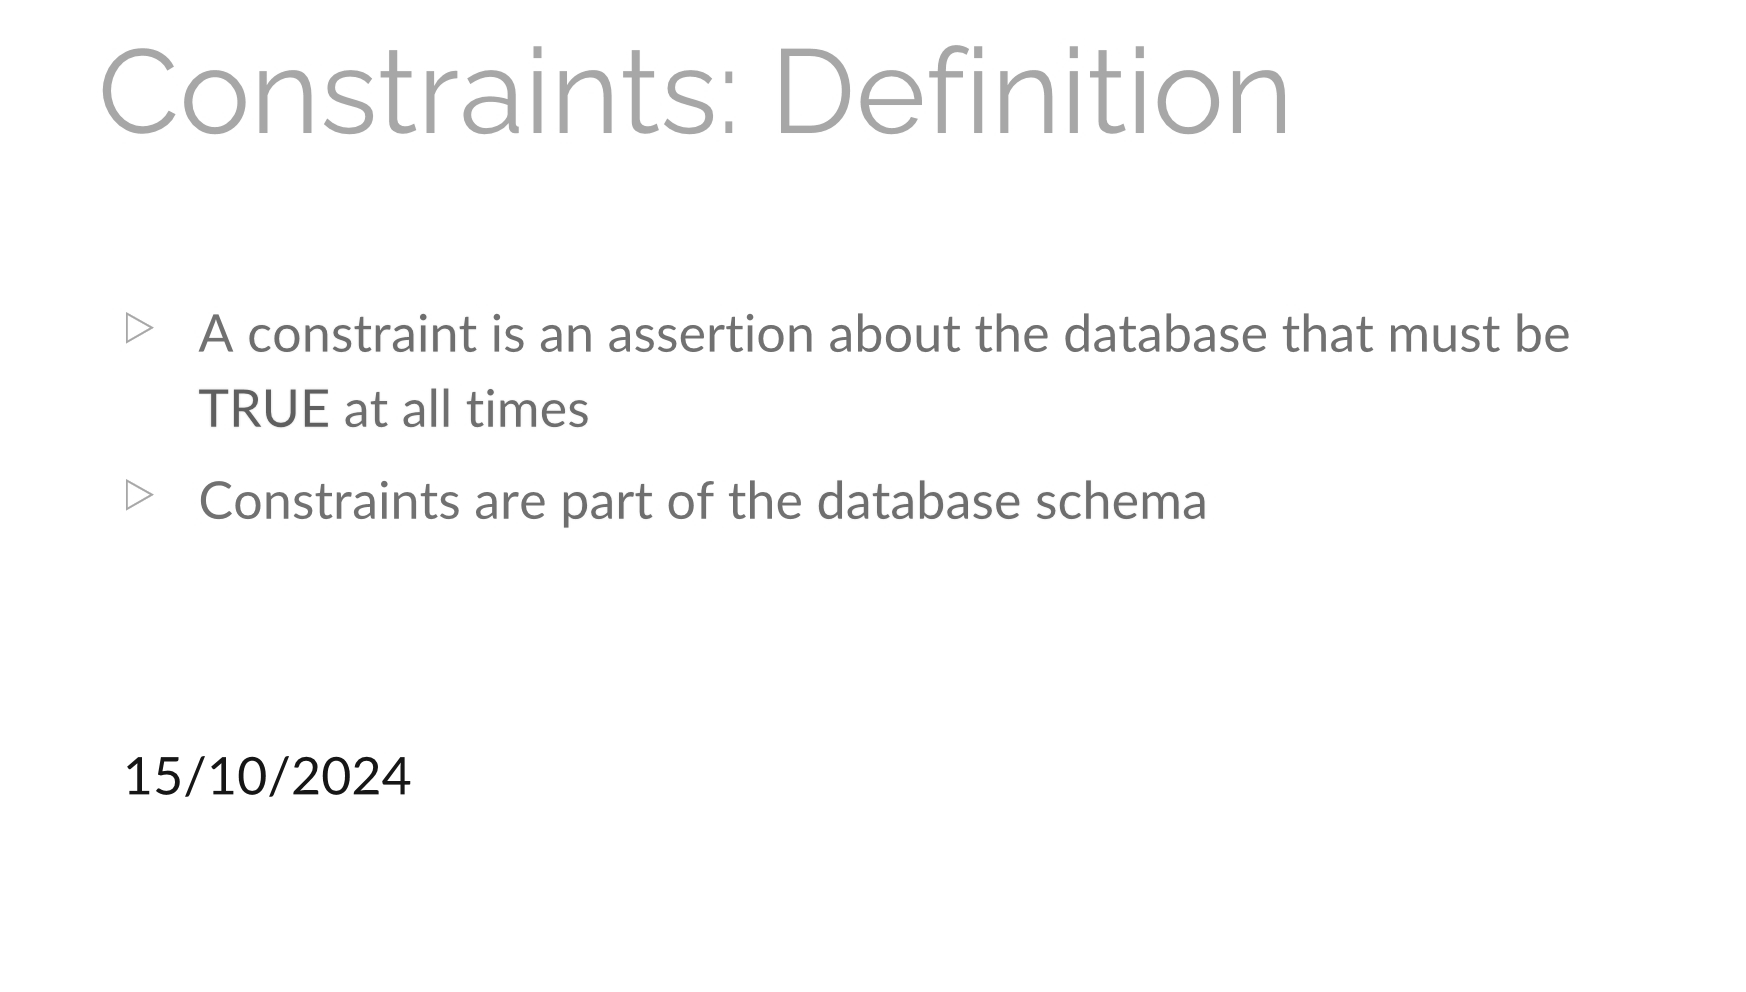

Execution time: 0.88秒


In [182]:
start_time = time.time()

img = gray
cv2_imshow(img)
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f}秒")

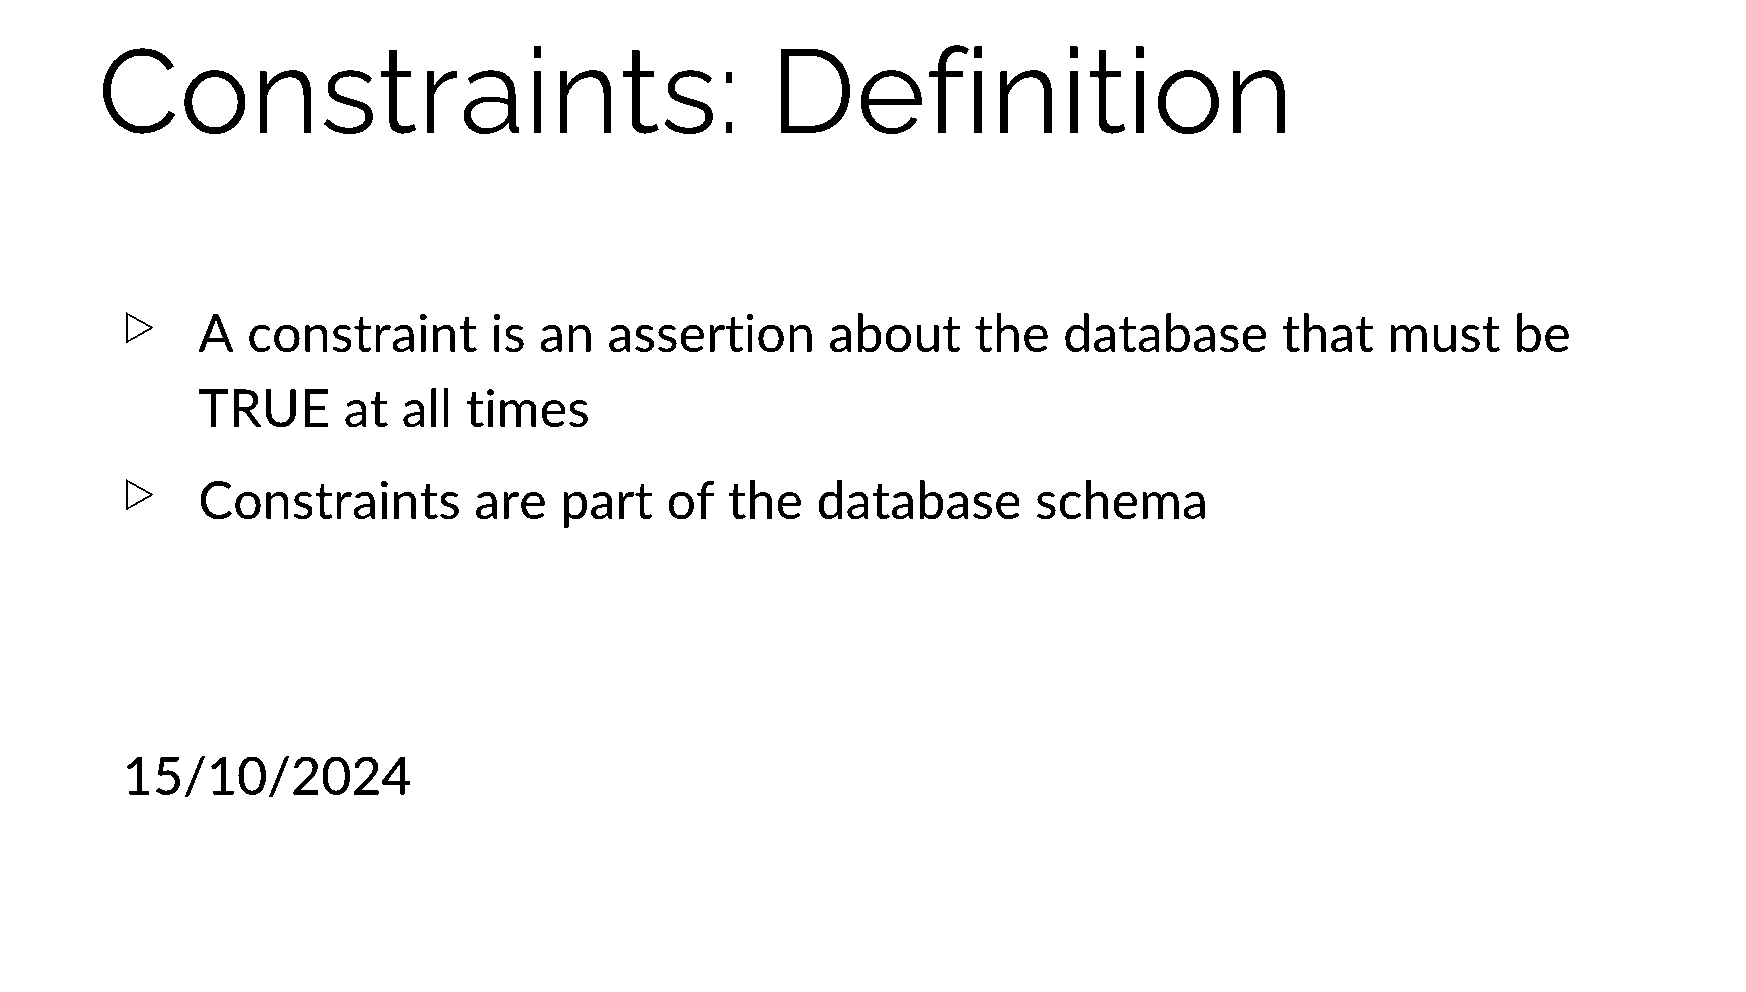

Execution time: 0.68秒


In [183]:
start_time = time.time()

img = thresh
cv2_imshow(img)
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f}秒")


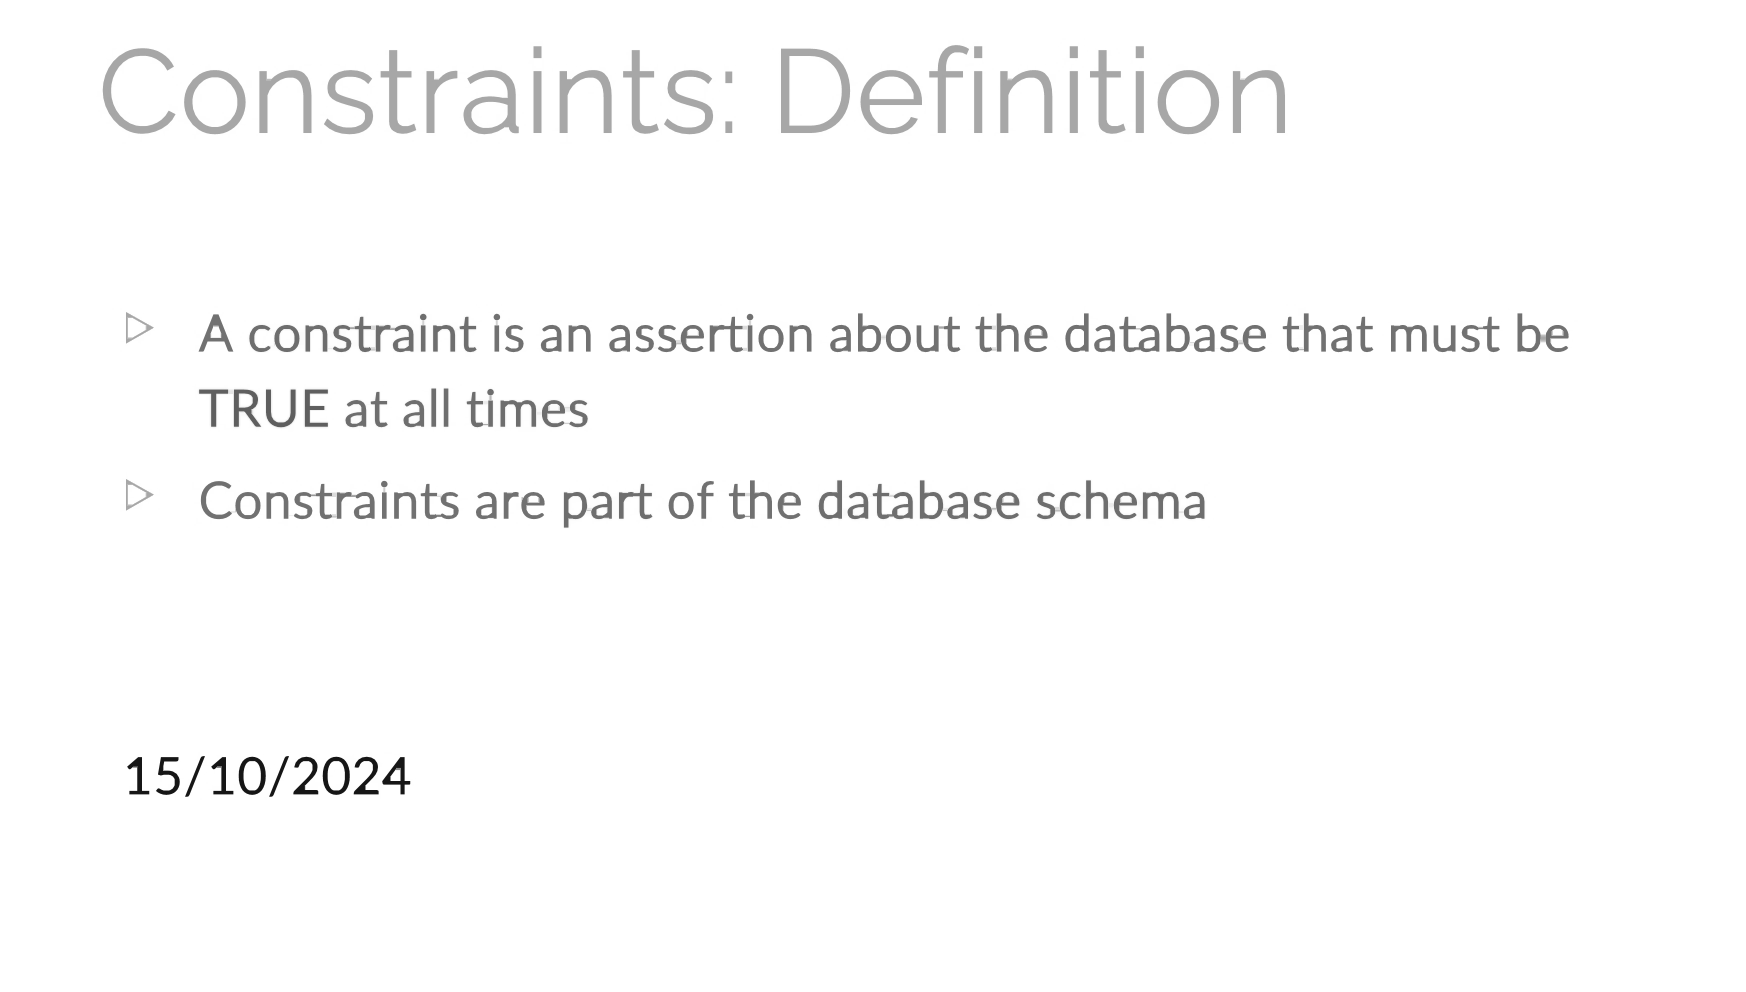

Execution time: 1.29秒


In [184]:
start_time = time.time()

img = opening
cv2_imshow(img)
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f}秒")

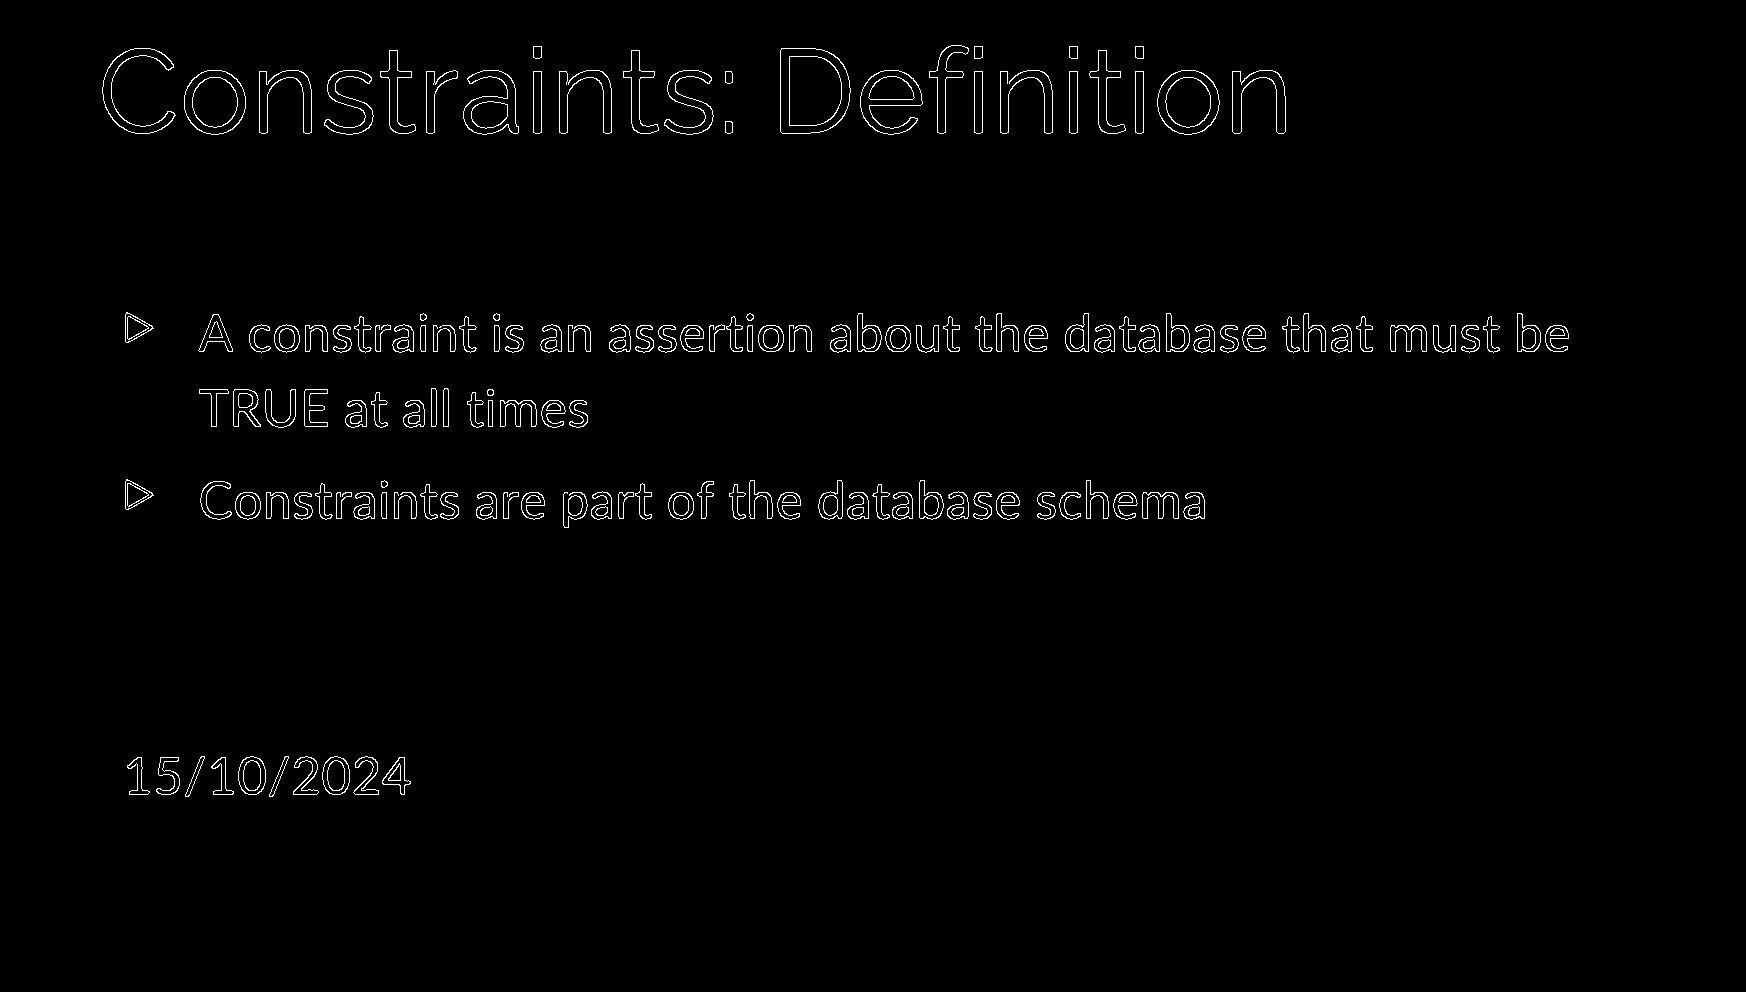

Execution time: 0.81秒


In [185]:
start_time = time.time()

img = canny
cv2_imshow(img)
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f}秒")

# **keys**

In [186]:
import cv2
import pytesseract
from pytesseract import Output

start_time = time.time()

img = cv2.imread(im1)

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f}秒")

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])
Execution time: 0.70秒


# **Getting boxes around text**

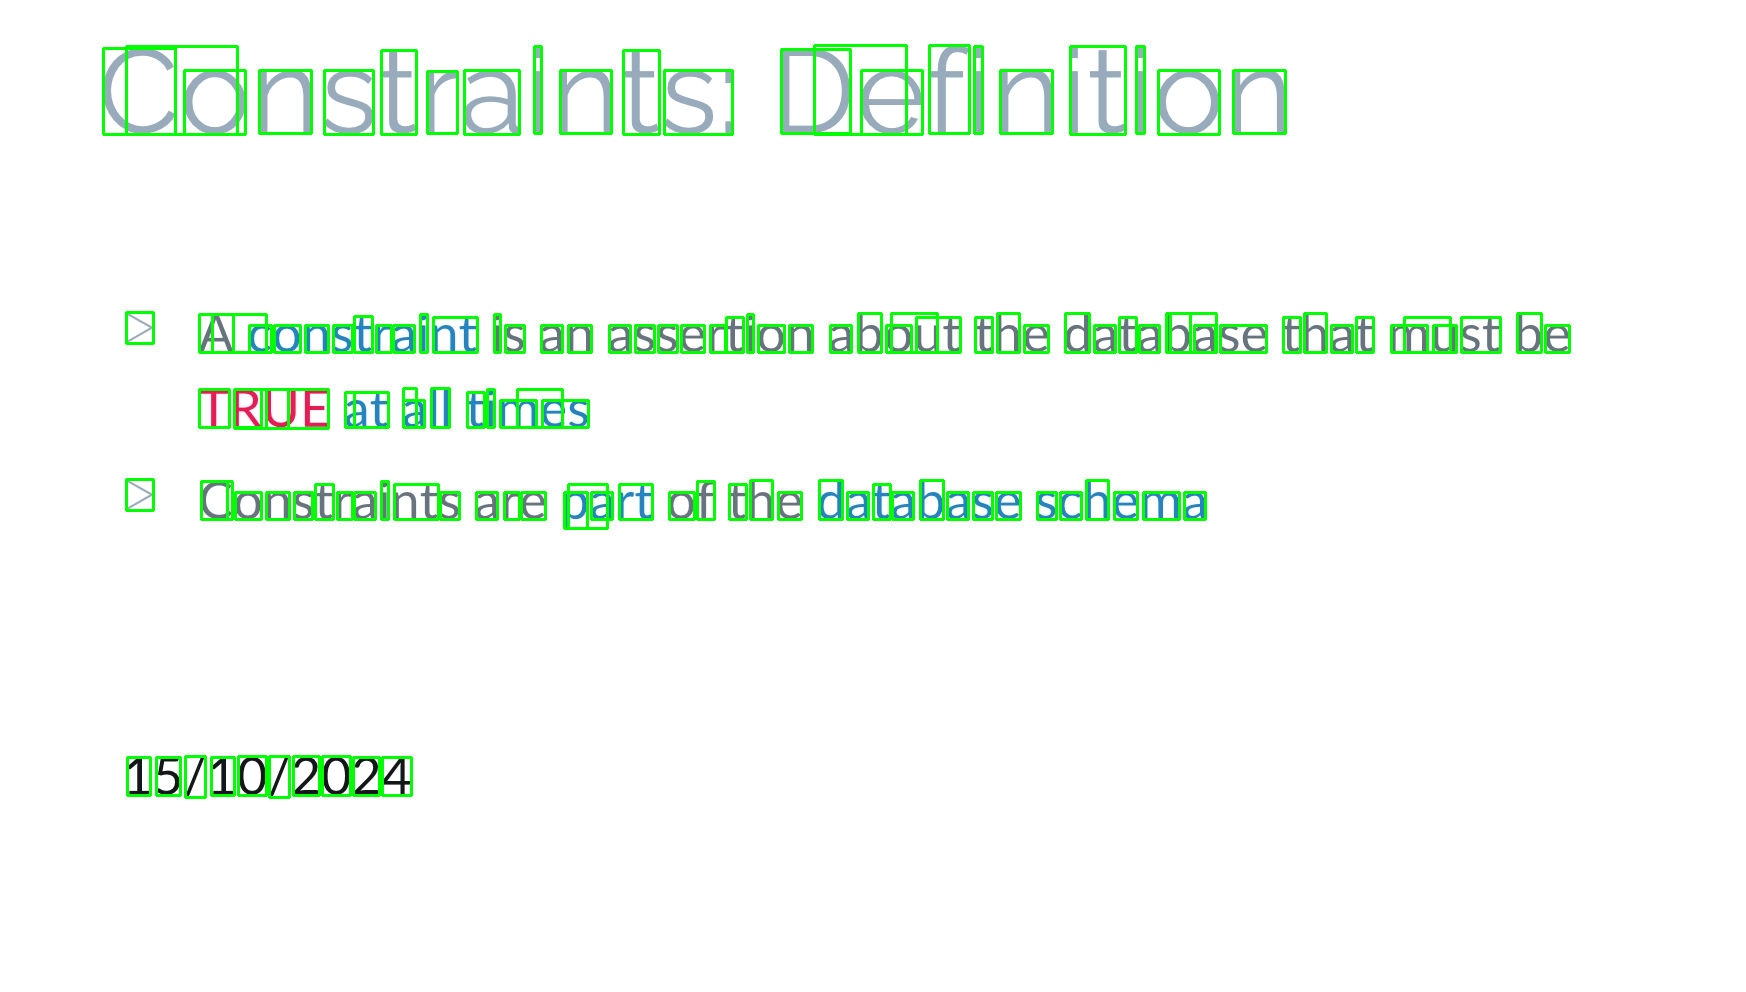

Execution time: 0.78秒


In [187]:
import cv2
import pytesseract

start_time = time.time()

img = cv2.imread(im1)

h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2_imshow( img)

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f}秒")


# **Getting boxes around text words**

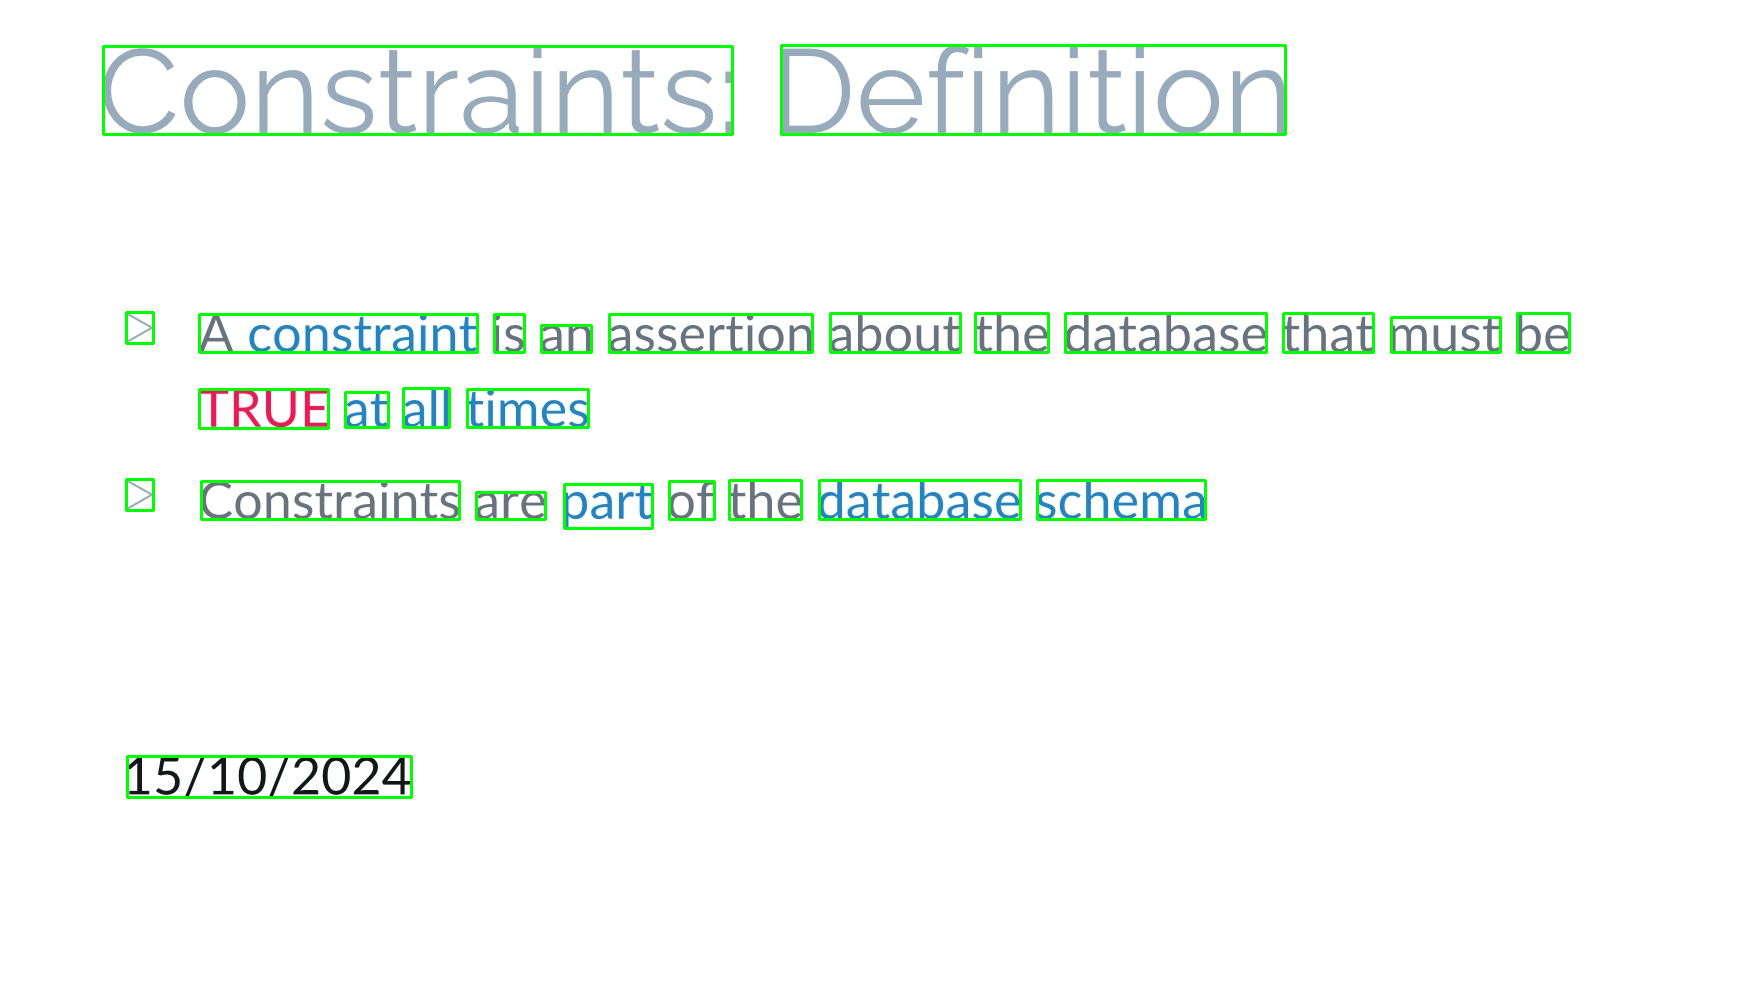

Execution time: 0.09秒


In [188]:
start_time = time.time()

img = cv2.imread(im1)

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(img)

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f}秒")

# **Text template matching**

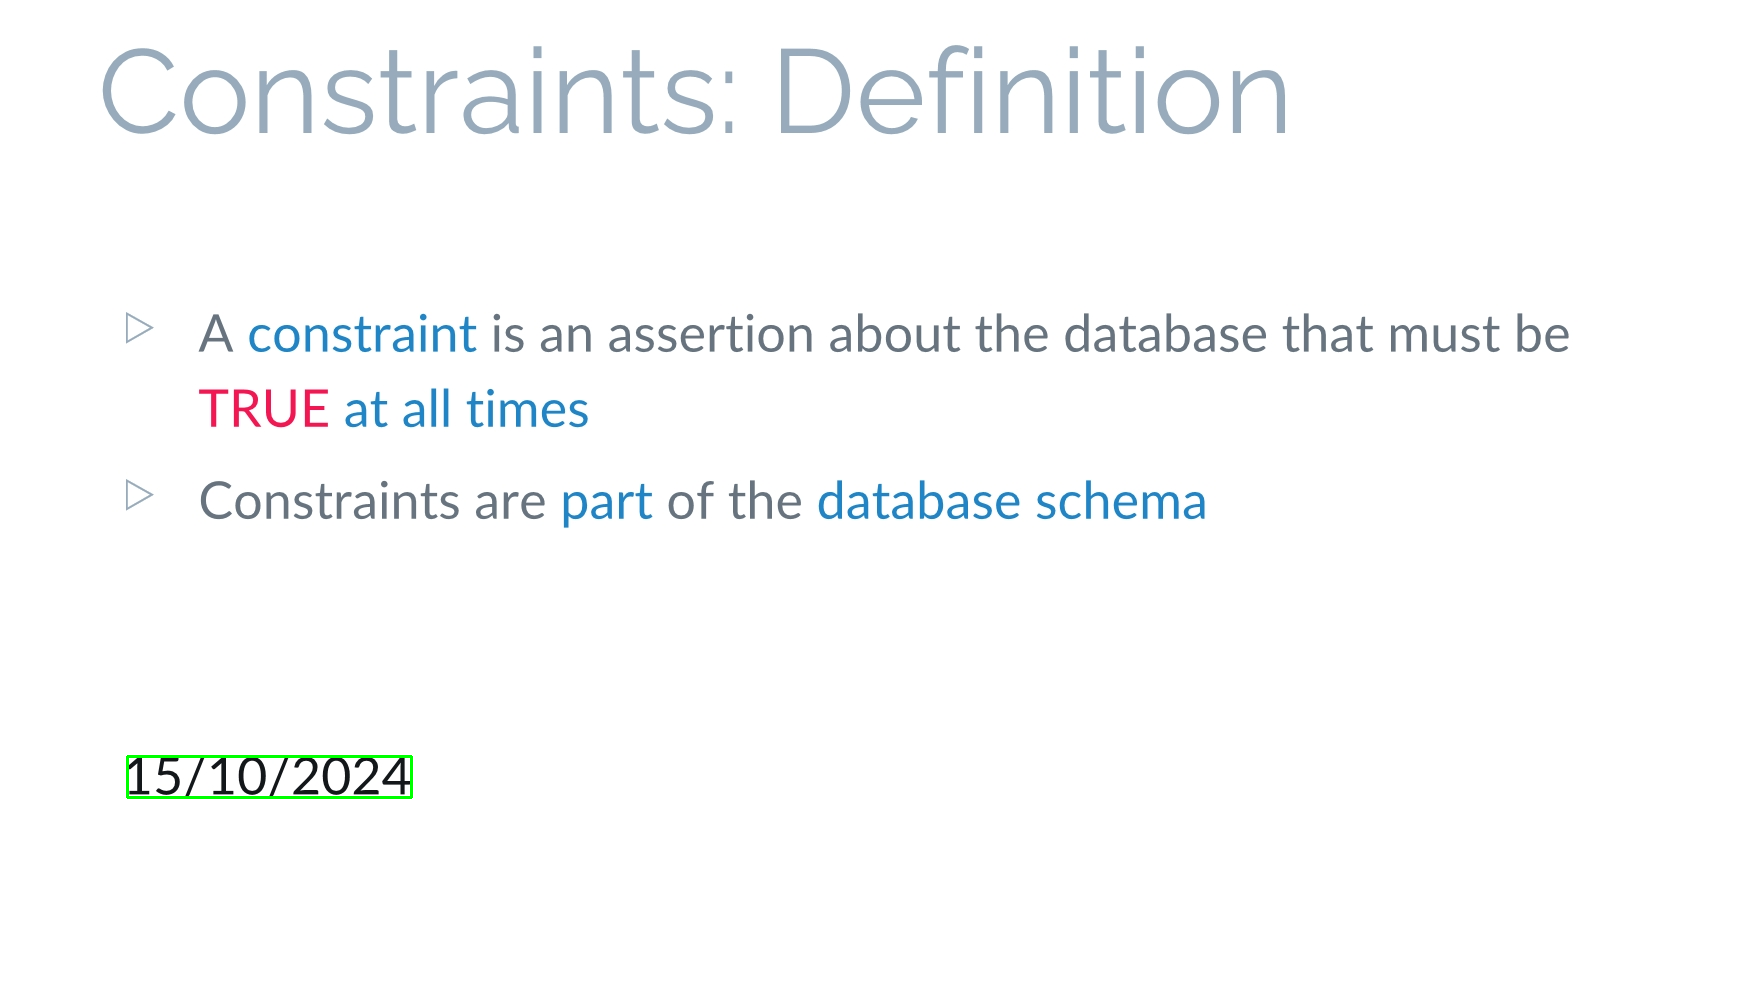

Execution time: 0.79秒


In [189]:
import re
import cv2
import pytesseract
from pytesseract import Output

start_time = time.time()

img = cv2.imread(im1)

d = pytesseract.image_to_data(img, output_type=Output.DICT)
keys = list(d.keys())

date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
    	if re.match(date_pattern, d['text'][i]):
	        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
	        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow( img)

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f}秒")

# **Custom detection, only numbers**

In [190]:
from sklearn.metrics import precision_score, recall_score, f1_score

start_time = time.time()


img = cv2.imread(im1)

custom_config = r'--oem 3 --psm 6 outputbase digits'
number = pytesseract.image_to_string(img, config=custom_config)
print(number)

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f}秒")

2
15102024

Execution time: 0.78秒


# **Blacklisting characters**

In [191]:
start_time = time.time()

custom_config = r'-c tessedit_char_blacklist=0123456789 --psm 6'
blacklisting = pytesseract.image_to_string(img, config=custom_config)

print (blacklisting)

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f}秒")

Constraints: Definition
> A constraint is an assertion about the database that must be
TRUE at all times
> Constraints are part of the database schema
//

Execution time: 1.48秒


# **Script, run in loop for read pages**

In [192]:
start_time = time.time()

img = cv2.imread(im1)


def read_text_from_image(image):
  """Reads text from an image file and outputs found text to text file"""
  # Convert the image to grayscale
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Perform OTSU Threshold
  ret, thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

  rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))

  dilation = cv2.dilate(thresh, rect_kernel, iterations = 1)

  contours, hierachy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

  image_copy = image.copy()

  for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    cropped = image_copy[y : y + h, x : x + w]

    file = open("results.txt", "a")

    text = pytesseract.image_to_string(cropped)

    file.write(text)
    file.write("\n")

  file.close()

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f}秒")

Execution time: 0.02秒


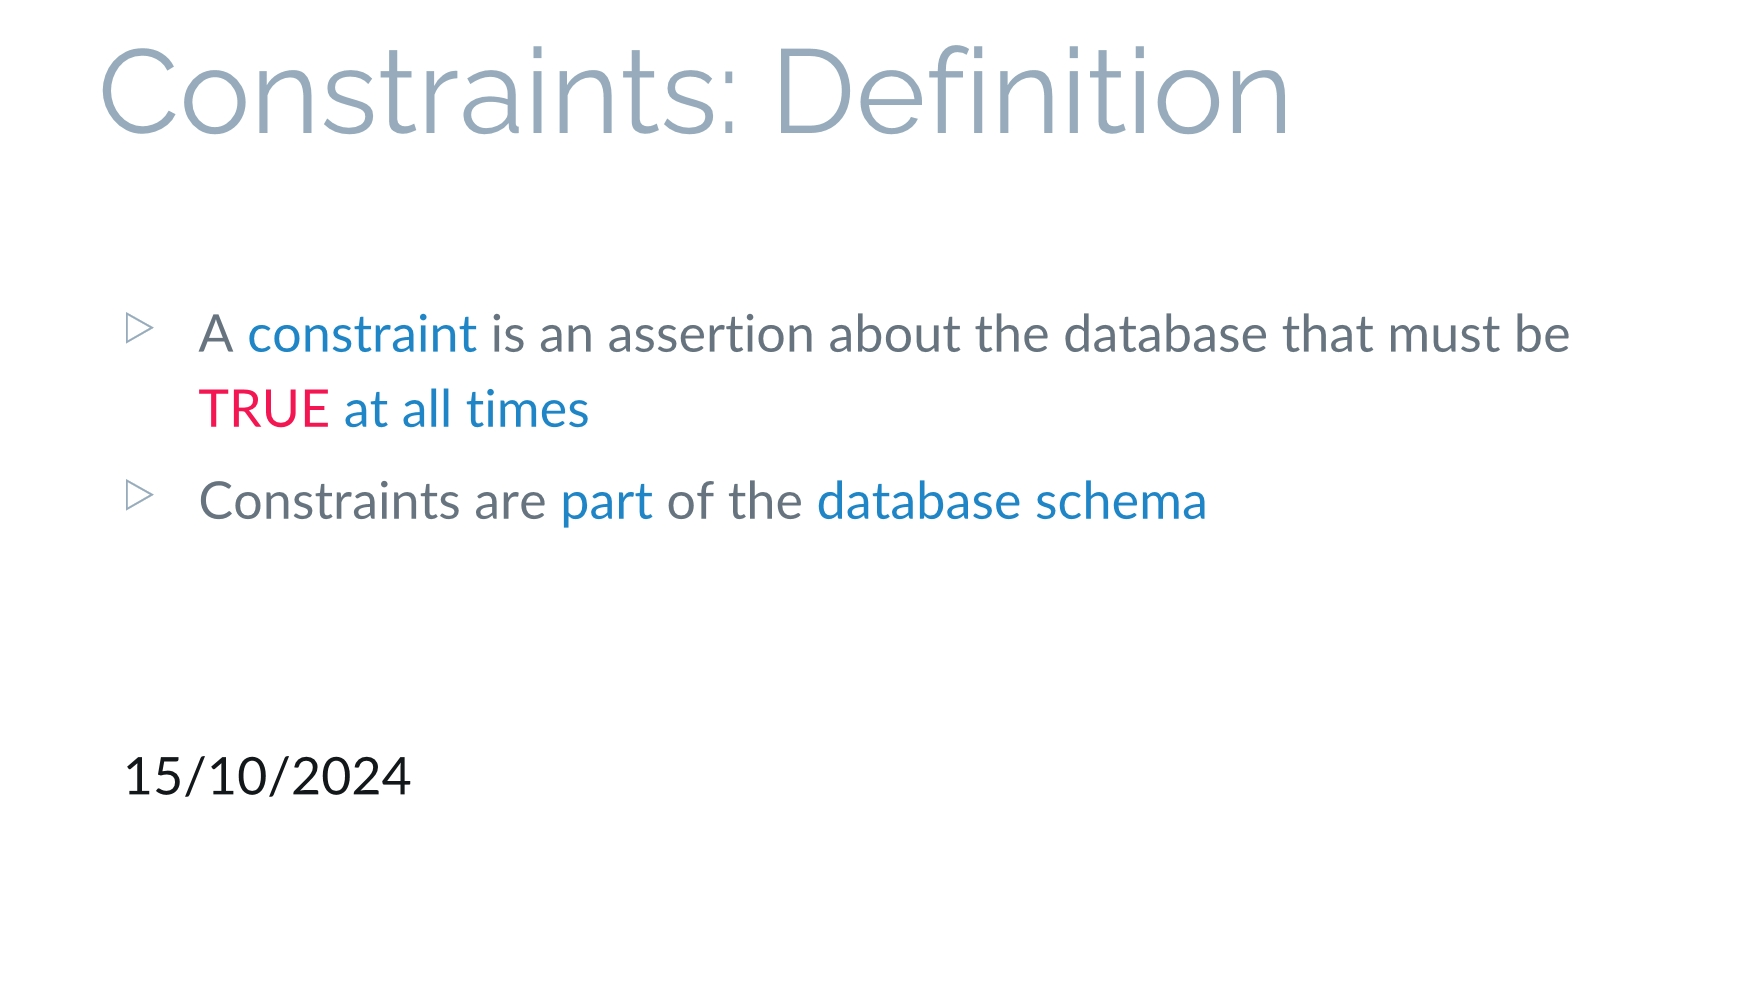









nts:







about the database that



must be



A constraint is an



assertion



TRUE at all



times





part of the



database



schema



Constraints are



15/10/2024









nts:







about the database that



must be



A constraint is an



assertion



TRUE at all



times





part of the



database



schema



Constraints are



15/10/2024









nts:







about the database that



must be



A constraint is an



assertion



TRUE at all



times





part of the



database



schema



Constraints are



15/10/2024









nts:







about the database that



must be



A constraint is an



assertion



TRUE at all



times





part of the



database



schema



Constraints are



15/10/2024









nts:







about the database that



must be



A constraint is an



assertion



TRUE at all



times





part of the



database



schema



Constra

In [193]:
start_time = time.time()

image = cv2.imread(im1)
read_text_from_image(image)

# OCR results
cv2_imshow(image)
f = open("results.txt", "r")
lines = f.readlines()
lines.reverse()
for line in lines:
    print(line)
f.close()

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f}秒")